# EXPLORATORY DATA ANALYSIS

In [1]:
# Import all required modules
import datetime as dt 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# For training
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# For evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [26]:
# Read our datset
data = pd.read_csv('dataset/diaries_transactions_all.csv')

In [18]:
# Check our dataset size 
data.shape

(483949, 58)

In [33]:
# Show columns in our dataset
data.columns

Index(['hh_ids', 'unique_hhs', 'first_trx_date_hh', 'last_trx_date_hh',
       'tot_hh_daysofobs', 'tot_hh_monthsofobs', 'interview_designation',
       'int_date', 'int_month', 'int_year', 'int_yr_mo', 'first_int_date',
       'account_ids', 'unique_accnts', 'm_ids_owner', 'unique_hm_owner',
       'account_bsheet_desig', 'account_startclose_balance', 'account_formal',
       'account_liquid', 'first_trx_date_acc', 'last_trx_date_acc',
       'tot_acc_daysofobs', 'tot_acc_monthsofobs', 'trx_id', 'm_ids_trx',
       'trx_date', 'trx_month', 'trx_year', 'trx_yr_mo', 'trx_dq_round',
       'trx_stdtime_days_hh', 'trx_stdtime_mnths_hh', 'trx_stdtime_days_acc',
       'trx_stdtime_mnths_acc', 'trx_class_code', 'trx_class_desc',
       'trx_family_code', 'trx_family_desc', 'trx_type_code', 'trx_type_desc',
       'trx_prx_purpose', 'trx_prx_purpose_fd', 'trx_fee',
       'trx_bsheet_direction', 'trx_mode_code', 'trx_mode_desc',
       'trx_place_incommunity', 'trx_distance_km', 'trx_outlet'

In [14]:
# Show info about our column data types
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483949 entries, 0 to 483948
Data columns (total 58 columns):
hh_ids                        483949 non-null object
unique_hhs                    298 non-null float64
first_trx_date_hh             483949 non-null object
last_trx_date_hh              483949 non-null object
tot_hh_daysofobs              483949 non-null int64
tot_hh_monthsofobs            483949 non-null int64
interview_designation         483681 non-null object
int_date                      483949 non-null object
int_month                     483949 non-null int64
int_year                      483949 non-null int64
int_yr_mo                     483949 non-null object
first_int_date                483949 non-null object
account_ids                   483949 non-null object
unique_accnts                 9546 non-null float64
m_ids_owner                   483949 non-null object
unique_hm_owner               670 non-null float64
account_bsheet_desig          77070 non-null objec

In [34]:
# Get more detailed information on our dataset
data.describe()

,unique_hhs,tot_hh_daysofobs,tot_hh_monthsofobs,int_month,int_year,unique_accnts,unique_hm_owner,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,...,trx_fee,trx_mode_code,trx_place_incommunity,trx_distance_km,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
count,298.0,483949.000000,483949.000000,483949.000000,483949.000000,9546.0,670.0,483949.000000,483949.000000,4.839490e+05,...,77070.000000,476292.000000,457703.000000,457498.000000,4.834300e+05,483430.000000,483949.000000,12798.000000,12798.000000,483949.000000
mean,1.0,394.805825,13.125895,6.426041,2012.847717,1.0,1.0,421.460920,14.157174,7.068031e+16,...,0.067679,2.199067,0.869527,6.824379,6.547228e+02,7.702621,0.003350,3.616619,307.412564,7.336331
std,0.0,32.657529,1.141561,3.204513,0.359490,0.0,0.0,118.927981,4.169955,1.964200e+16,...,0.251195,3.461173,0.336824,79.340121,5.453241e+03,64.155778,0.057778,28.127688,2390.853350,3.766231
min,1.0,214.000000,7.000000,1.000000,2012.000000,1.0,1.0,0.000000,0.000000,3.413549e+16,...,0.000000,1.000000,0.000000,0.000000,-2.595000e+04,-305.294100,0.000000,0.000000,0.000000,0.000000
25%,1.0,375.000000,12.000000,4.000000,2013.000000,1.0,1.0,358.000000,12.000000,5.713807e+16,...,0.000000,1.000000,1.000000,0.000000,2.000000e+01,0.235294,0.000000,0.000000,0.000000,4.275862
50%,1.0,391.000000,13.000000,7.000000,2013.000000,1.0,1.0,502.000000,17.000000,6.213598e+16,...,0.000000,1.000000,1.000000,0.000000,5.000000e+01,0.588235,0.000000,0.470588,40.000000,7.620690
75%,1.0,413.000000,14.000000,9.000000,2013.000000,1.0,1.0,502.000000,17.000000,8.913662e+16,...,0.000000,1.000000,1.000000,0.000000,2.300000e+02,2.705882,0.000000,1.529412,130.000000,10.482760
max,1.0,501.000000,17.000000,12.000000,2015.000000,1.0,1.0,502.000000,17.000000,1.121385e+17,...,1.000000,19.000000,1.000000,14317.670000,1.200000e+06,14117.650000,1.000000,1529.412000,130000.000000,17.275860


In [39]:
# Show sample data
data.tail(3)

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,...,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
483946,KZIMA08,NaN,21mar2013,21oct2013,214,7,04=Diaries Interview,21aug2013,8,2013,...,0.378316,"08=Restaurant, bar, hotel, cyber",Outflow,50.0,0.588235,0,NaN,NaN,NaN,4.827586
483947,KMOMK03,NaN,07sep2012,25oct2013,413,14,04=Diaries Interview,01aug2013,8,2013,...,74.572090,"10=Institution (clinic, school, church, etc.)",Outflow,1650.0,19.411760,0,NaN,NaN,NaN,10.965520
483948,KMOMM11,NaN,17aug2012,04oct2013,413,14,04=Diaries Interview,01nov2012,11,2012,...,1.590156,NaN,Outflow,100.0,1.176471,0,NaN,NaN,NaN,2.413793


In [16]:
# Pick a random series and show its content.
data.trx_inkind_value_usd

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
6              NaN
7              NaN
8              NaN
9              NaN
10             NaN
11             NaN
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             NaN
22             NaN
23             NaN
24             NaN
25             NaN
26             NaN
27             NaN
28             NaN
29             NaN
            ...   
483919         NaN
483920         NaN
483921         NaN
483922         NaN
483923         NaN
483924    1.176471
483925         NaN
483926         NaN
483927         NaN
483928    1.176471
483929         NaN
483930         NaN
483931         NaN
483932         NaN
483933         NaN
483934         NaN
483935         NaN
483936         NaN
483937         NaN
483938    1.176471
483939         NaN
483940      

In [27]:
# Drop cells with null values
shaken_data = data.dropna();

In [28]:
shaken_data.shape

# We're left with no rows indicating that at least each each column contains a null value 😆😆
# So we revert to using the old dataframe
# The nlls have to be replaced with int values or else the predictive model will fail at the end.

(0, 58)

# Machine Learning and regression
After performing the EDA I felt like I might just go ahead and see if I can perform some predictive analysis on columns on the dataset using regression.

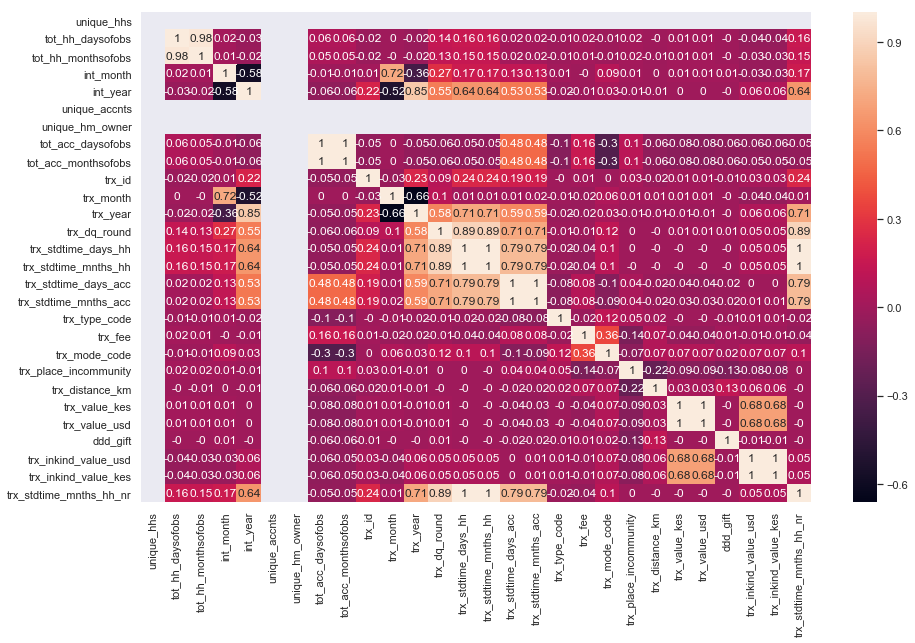

In [41]:
# I plot a correlation heatmap to show how each of the columns is corelated to all other columns
# This columns with a high positive[1] (light orange - white) or negative [-1] (black) correlation will 
# greatly affect the output of our model as compared to the ones with no [0] (purple) corelation. 
# From the heatmap I see, there are more uncorrelated valuesas compared to corelated values. 
# When conducting the training I should make sure to use the corelating valies even though our
# output model may not be as accurate as required. 

correlation_matrix = data.corr().round(2)
annot = True # to print the values inside the square
sns.set(rc={'figure.figsize':(15,9)})
sns.heatmap(data=correlation_matrix, annot=True);

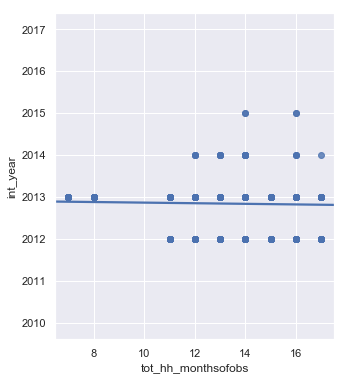

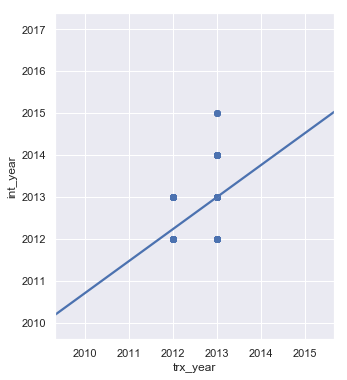

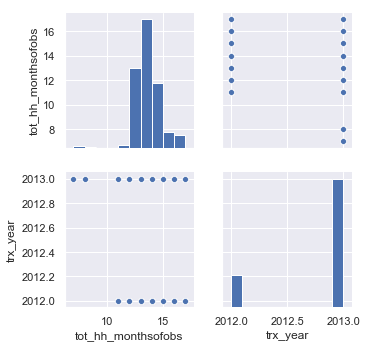

In [44]:
# Create pair plots of random columns showing how they are related

def visualize(selected_features):
        for var in selected_features:
            f, ax = plt.subplots(figsize=(5, 6))
            sns.regplot(x=var, y="int_year", data=data, ax=ax)
        sns.pairplot(data, vars=selected_features)
    
visualize(['tot_hh_monthsofobs','trx_year'])

In [48]:
# Create our regression model

def model(selected_features):
#     Define X,Y
    X = data[selected_features]
    y = data['trx_year']
    clf = linear_model.LinearRegression() # Define our linear model
    x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state=7) # Split the set into a test(30%) set and training set (70%) 
    clf.fit(x_train,y_train) # The actual training
    y_pred = clf.predict(x_test) # Prediction
    mse = mean_squared_error(y_test, y_pred)
    mae= mean_absolute_error(y_test, y_pred)
    rscore = r2_score(y_test, y_pred)
    dictionary = {"y_pred":y_pred,"mae":mae,"mse":mse,"rscore":rscore,"intercept":clf.intercept_,"coef":clf.coef_, "y_test":y_test,}
    return dictionary

Calling the above function below will throw an error because there are **NaN** fields and **strings** which have to be replaced with **int** or **floats**.

The dataset might not be the best for conducting predictive analysis using regression but it was fun to try.

In [47]:
# Will print error

model1 = model(['tot_hh_monthsofobs', 'trx_dq_round']) # Pass in a few columns

model2 = model(data.columns) # Pass the whole dataframe


evaluations = pd.DataFrame({'Model_1':  [ model1['mae'],  model1['mse'],model1['rscore'], model1['intercept']],
                        'Model_2': [ model2['mae'],  model2['mse'],model2['rscore'], model2['intercept']],
                        'Model_3': [ model3['mae'],  model3['mse'],model3['rscore'], model3['intercept']],
                       },
                          index = pd.Index(['MAE','MSE',"R-Score","Intercept"]))

print("\n",evaluations.head())

results = pd.DataFrame({'Actual':list(model1['y_test']) , 
                        'Model_1_prediction':  model1['y_pred'].flatten(),
                        'Model_2 _prediction':  model2['y_pred'].flatten()
                       })
print("\n",results.head(10))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').